In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -U gdown


In [3]:
import gdown

# File ID extracted from the shared Google Drive link
file_id = "1LA5hRd5B8bO-B8kK_FxbTCK9DnaZFyKQ"
output = "paddy_disease_dataset.zip"

# Download the file
gdown.download(id=file_id, output=output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1LA5hRd5B8bO-B8kK_FxbTCK9DnaZFyKQ
From (redirected): https://drive.google.com/uc?id=1LA5hRd5B8bO-B8kK_FxbTCK9DnaZFyKQ&confirm=t&uuid=5af75842-f63c-45c4-94d1-927dada39c0b
To: /content/paddy_disease_dataset.zip
100%|██████████| 4.99G/4.99G [01:14<00:00, 67.2MB/s]


'paddy_disease_dataset.zip'

In [4]:
import zipfile
import os

# Create output folder
extract_dir = "/content/paddy_data"
os.makedirs(extract_dir, exist_ok=True)

# Unzip using shell (fast and efficient)
!unzip -q "paddy_disease_dataset.zip" -d "/content/paddy_data"


In [5]:
for root, dirs, files in os.walk("/content/paddy_data"):
    print(f"📂 {root}")
    for f in files[:5]:  # print first 5 files per folder only
        print(f"   └─ 📄 {f}")


📂 /content/paddy_data
   └─ 📄 metadata.csv
📂 /content/paddy_data/blast
   └─ 📄 PDD02672.jpg
   └─ 📄 PDD03990.jpg
   └─ 📄 PDD02273.jpg
   └─ 📄 PDD03064.jpg
   └─ 📄 PDD02173.jpg
📂 /content/paddy_data/normal
   └─ 📄 PDD12197.jpg
   └─ 📄 PDD11863.jpg
   └─ 📄 PDD12032.jpg
   └─ 📄 PDD10434.jpg
   └─ 📄 PDD11751.jpg
📂 /content/paddy_data/tungro
   └─ 📄 PDD12931.jpg
   └─ 📄 PDD13902.jpg
   └─ 📄 PDD12259.jpg
   └─ 📄 PDD13097.jpg
   └─ 📄 PDD12248.jpg
📂 /content/paddy_data/bacterial_leaf_streak
   └─ 📄 PDD00909.jpg
   └─ 📄 PDD00822.jpg
   └─ 📄 PDD00698.jpg
   └─ 📄 PDD00671.jpg
   └─ 📄 PDD00987.jpg
📂 /content/paddy_data/black_stem_borer
   └─ 📄 PDD01972.jpg
   └─ 📄 PDD02058.jpg
   └─ 📄 PDD01985.jpg
   └─ 📄 PDD01700.jpg
   └─ 📄 PDD01632.jpg
📂 /content/paddy_data/yellow_stem_borer
   └─ 📄 PDD16021.jpg
   └─ 📄 PDD15591.jpg
   └─ 📄 PDD16000.jpg
   └─ 📄 PDD15589.jpg
   └─ 📄 PDD15729.jpg
📂 /content/paddy_data/leaf_roller
   └─ 📄 PDD09020.jpg
   └─ 📄 PDD08813.jpg
   └─ 📄 PDD08882.jpg
   └─ 📄 PDD09389.jpg


In [6]:
import pandas as pd

# Load the metadata CSV
metadata_path = "/content/paddy_data/metadata.csv"
df_meta = pd.read_csv(metadata_path)

# Peek at the shape and first few rows
print("📄 Metadata Shape:", df_meta.shape)
print("\n🧠 Sample Rows:")
display(df_meta.head())

# Quick overview of columns
print("\n📊 Column Info:")
df_meta.info()

# Check for missing values
print("\n❌ Missing Values:")
print(df_meta.isnull().sum())


📄 Metadata Shape: (16225, 4)

🧠 Sample Rows:


,image_id,label,variety,age
0,PDD00001.jpg,bacterial_leaf_blight,45,65
1,PDD00002.jpg,bacterial_leaf_blight,45,60
2,PDD00003.jpg,bacterial_leaf_blight,45,55
3,PDD00004.jpg,bacterial_leaf_blight,KarnatakaPonni,50
4,PDD00005.jpg,bacterial_leaf_blight,45,72



📊 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  16225 non-null  object
 1   label     16225 non-null  object
 2   variety   16225 non-null  object
 3   age       16225 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 507.2+ KB

❌ Missing Values:
image_id    0
label       0
variety     0
age         0
dtype: int64


📋 Class Distribution:

label
normal                      2405
blast                       2351
hispa                       2151
tungro                      1951
white_stem_borer            1273
brown_spot                  1257
leaf_roller                 1095
downy_mildew                 868
yellow_stem_borer            765
bacterial_leaf_blight        648
black_stem_borer             506
bacterial_leaf_streak        505
bacterial_panicle_blight     450
Name: count, dtype: int64


/tmp/ipython-input-7-2186871562.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
/tmp/ipython-input-7-2186871562.py:21: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


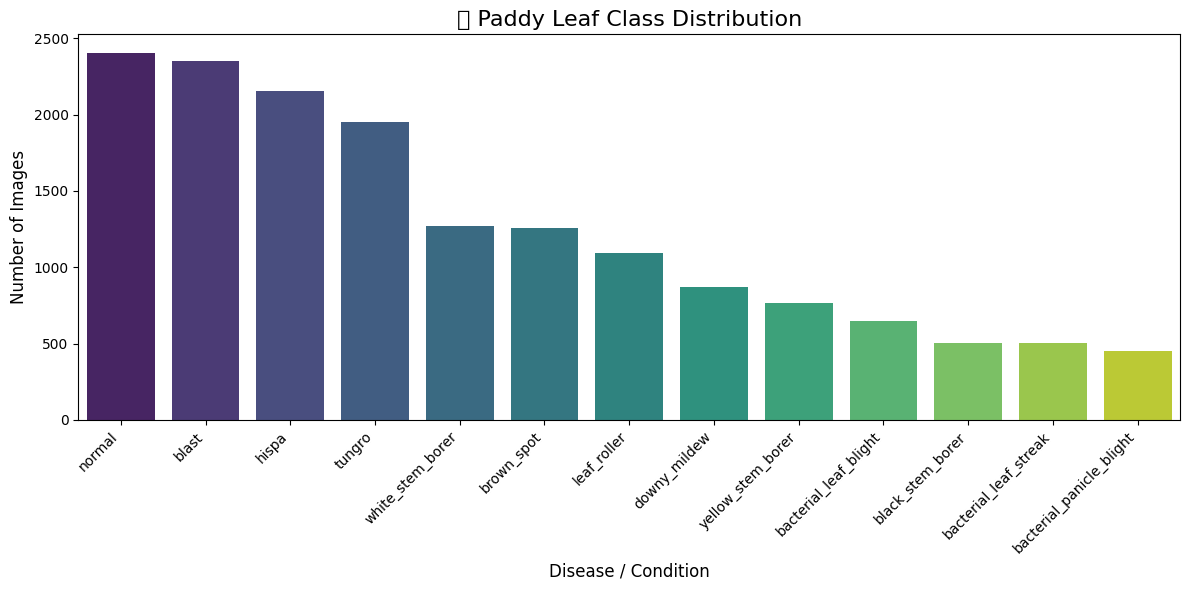

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load metadata
metadata_path = "/content/paddy_data/metadata.csv"
df_meta = pd.read_csv(metadata_path)

# Textual Summary
label_counts = df_meta['label'].value_counts()
print("📋 Class Distribution:\n")
print(label_counts)

# Plotting with seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("🌾 Paddy Leaf Class Distribution", fontsize=16)
plt.xlabel("Disease / Condition", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.tight_layout()
plt.show()


In [8]:
print("✅ Total Image Count in Metadata:", df_meta['label'].value_counts().sum())


✅ Total Image Count in Metadata: 16225


In [9]:
import os
from PIL import Image
from tqdm import tqdm

# Define paths
dataset_dir = "/content/paddy_data"
valid_exts = (".jpg", ".jpeg", ".png")

# Load metadata for valid image names
import pandas as pd
df_meta = pd.read_csv(os.path.join(dataset_dir, "metadata.csv"))
valid_filenames = set(df_meta["image_id"].values)

print("🧼 Cleaning dataset...")

removed_files = []

# Walk through all class folders
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)

    if not os.path.isdir(class_path) or class_folder == "metadata.csv":
        continue  # Skip non-directories and CSV

    for img_file in tqdm(os.listdir(class_path), desc=f"Checking {class_folder}"):
        img_path = os.path.join(class_path, img_file)

        # Remove files not in metadata
        if img_file not in valid_filenames:
            os.remove(img_path)
            removed_files.append(img_path)
            continue

        # Check if image is corrupted
        try:
            with Image.open(img_path) as img:
                img.verify()  # Will raise exception if corrupted
        except Exception as e:
            os.remove(img_path)
            removed_files.append(img_path)

print(f"\n✅ Cleaning complete! Total files removed: {len(removed_files)}")


🧼 Cleaning dataset...


Checking white_stem_borer: 100%|██████████| 1273/1273 [00:00<00:00, 13483.55it/s]


✅ Cleaning complete! Total files removed: 0


/tmp/ipython-input-10-1753024695.py:31: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


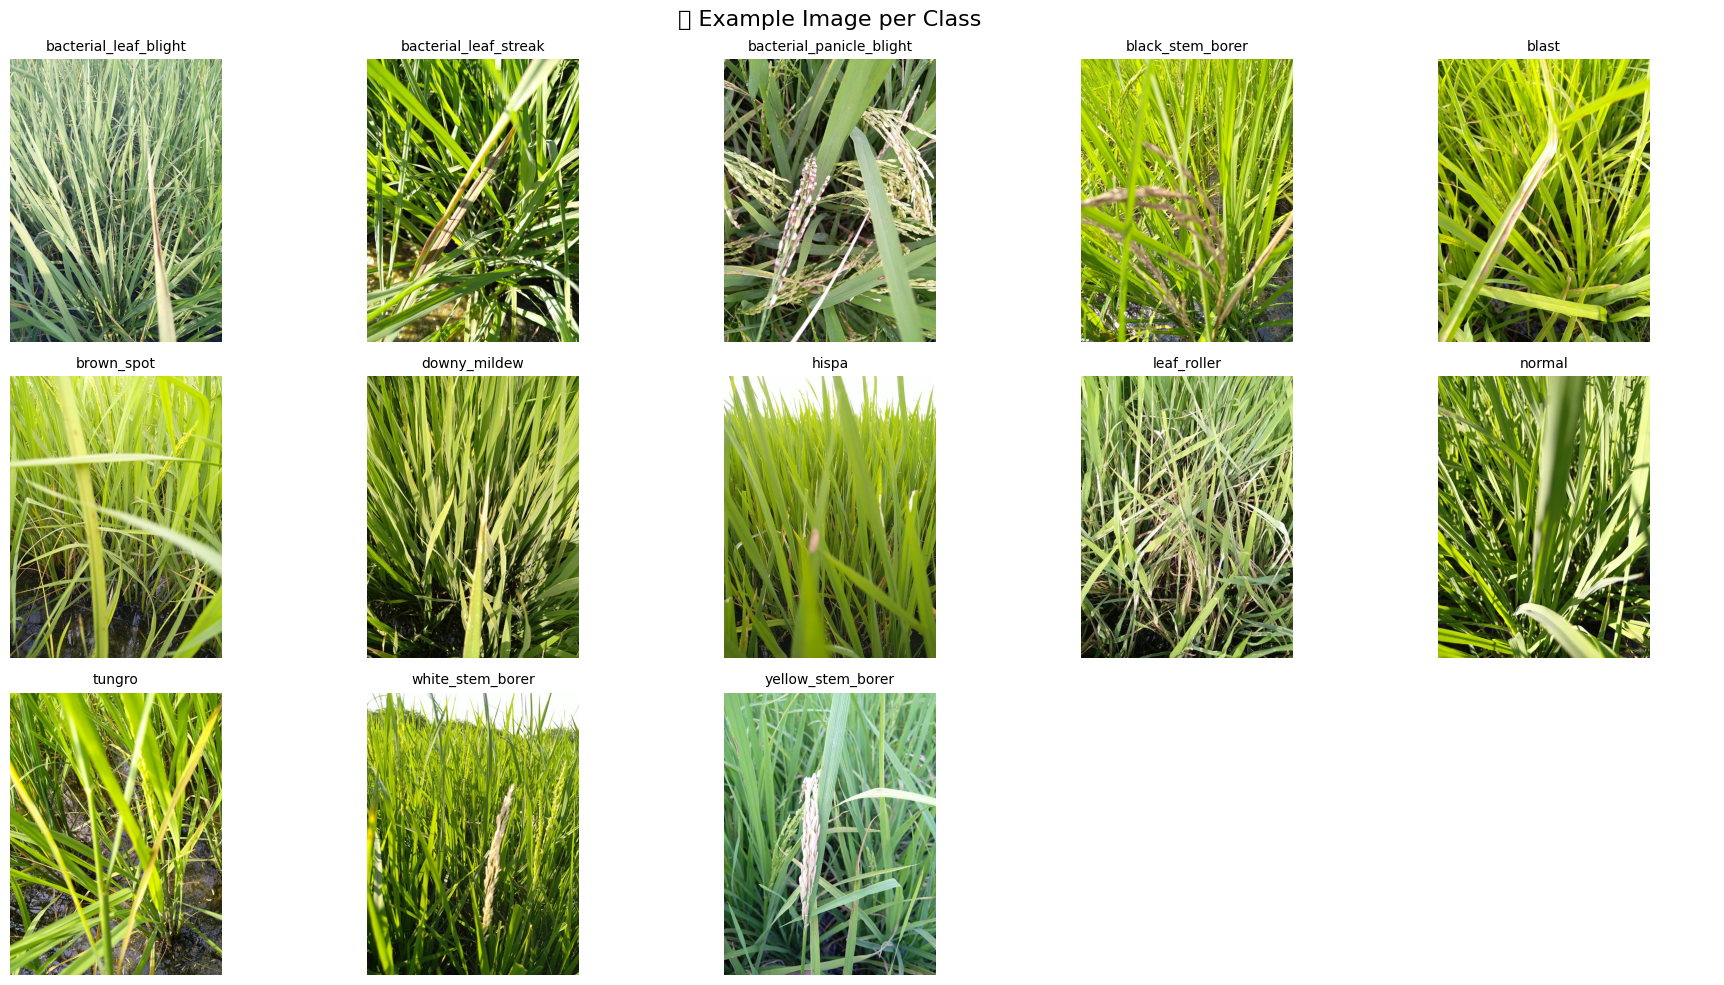

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display

# Setup
dataset_dir = "/content/paddy_data"
df_meta = pd.read_csv(os.path.join(dataset_dir, "metadata.csv"))

# 1. 📸 Show 1 sample image per class
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
axes = axes.flatten()
class_names = df_meta['label'].unique()

for i, label in enumerate(class_names):
    img_filename = df_meta[df_meta['label'] == label].iloc[0]['image_id']
    img_path = os.path.join(dataset_dir, label, img_filename)

    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=10)
    axes[i].axis('off')

# Turn off any unused axes
for j in range(len(class_names), len(axes)):
    axes[j].axis('off')

plt.suptitle("📸 Example Image per Class", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-2158720751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var_counts.index, y=var_counts.values, palette="coolwarm")
/tmp/ipython-input-11-2158720751.py:9: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


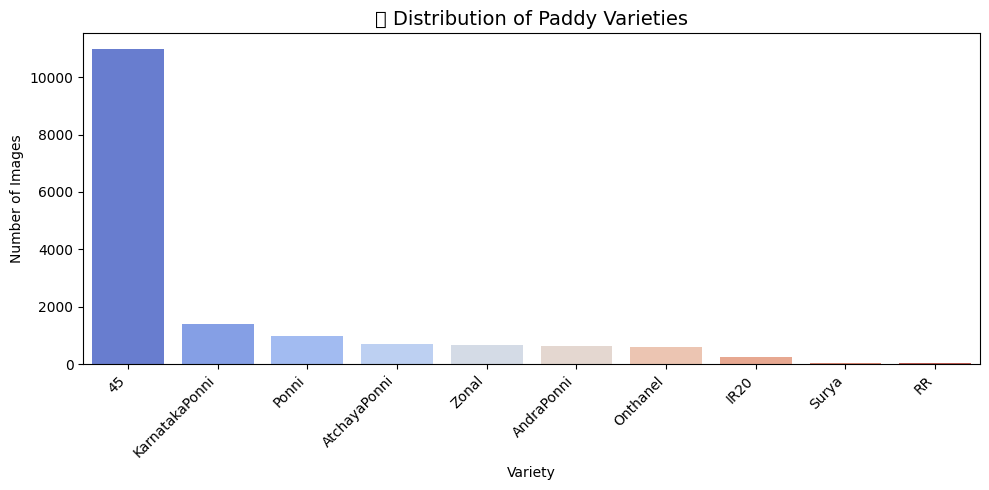

In [11]:
# 3. 🌾 Number of Unique Varieties
plt.figure(figsize=(10,5))
var_counts = df_meta['variety'].value_counts()
sns.barplot(x=var_counts.index, y=var_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("🌾 Distribution of Paddy Varieties", fontsize=14)
plt.xlabel("Variety")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()



/tmp/ipython-input-12-2685046403.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


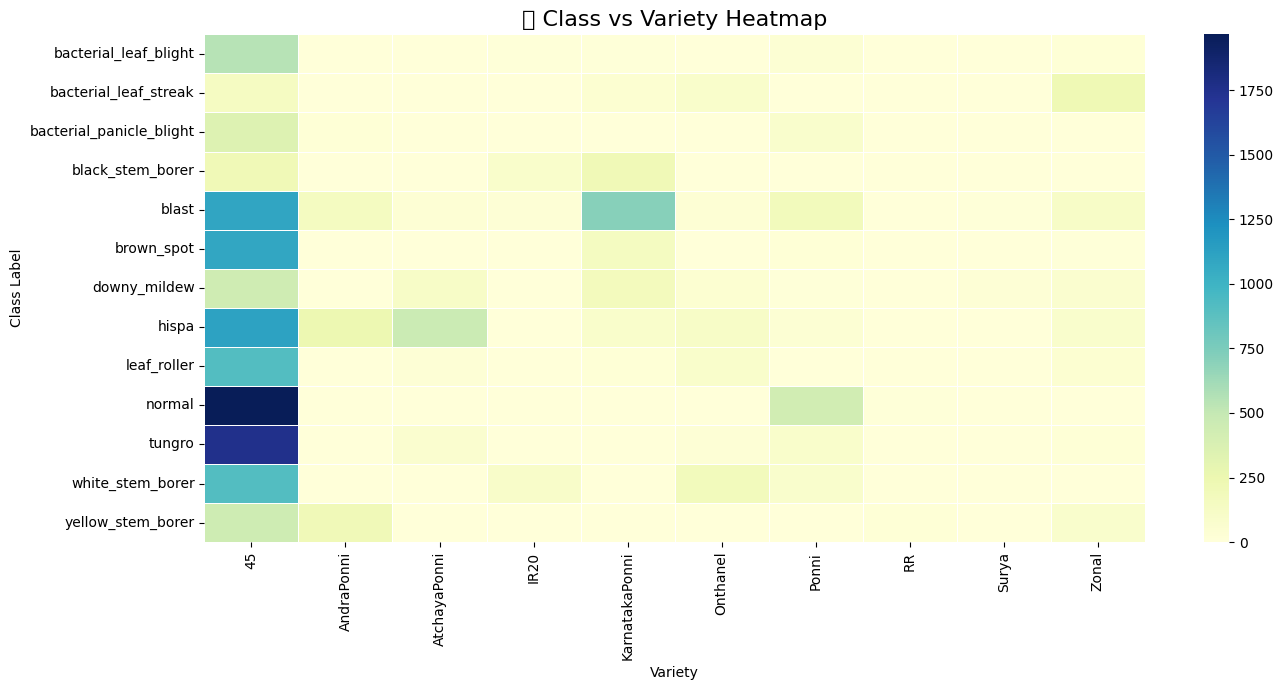

In [12]:
# 4. 📚 Varieties across Classes (heatmap)
pivot_df = df_meta.groupby(['label', 'variety']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df, cmap="YlGnBu", linewidths=0.5)
plt.title("📊 Class vs Variety Heatmap", fontsize=16)
plt.xlabel("Variety")
plt.ylabel("Class Label")
plt.tight_layout()
plt.show()


In [13]:
print("📊 Age Distribution Summary:\n")
print(df_meta["age"].describe())


📊 Age Distribution Summary:

count    16225.000000
mean        63.885855
std          8.828587
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         80.000000
Name: age, dtype: float64


In [14]:
# Output all raw unique varieties as-is
all_varieties = df_meta["variety"].unique()

print(f"🌱 Total Varieties (Raw): {len(all_varieties)}\n")
print("📋 All Varieties:\n")
for i, v in enumerate(sorted(all_varieties), 1):
    print(f"{i:>2}. {v}")


🌱 Total Varieties (Raw): 10

📋 All Varieties:

 1. 45
 2. AndraPonni
 3. AtchayaPonni
 4. IR20
 5. KarnatakaPonni
 6. Onthanel
 7. Ponni
 8. RR
 9. Surya
10. Zonal


In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get sorted list of all unique class names
class_labels = sorted(df_meta['label'].unique())
class_indices = {label: idx for idx, label in enumerate(class_labels)}

# Compute class weights
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array(class_labels),
    y=df_meta['label'].values
)

# Final dictionary
class_weights = {class_indices[label]: weight for label, weight in zip(class_labels, weights)}

# Output for sanity check
print("🧮 Computed Class Weights:")
for k, v in class_weights.items():
    print(f"Class {k} ({class_labels[k]}): {v:.2f}")


🧮 Computed Class Weights:
Class 0 (bacterial_leaf_blight): 1.93
Class 1 (bacterial_leaf_streak): 2.47
Class 2 (bacterial_panicle_blight): 2.77
Class 3 (black_stem_borer): 2.47
Class 4 (blast): 0.53
Class 5 (brown_spot): 0.99
Class 6 (downy_mildew): 1.44
Class 7 (hispa): 0.58
Class 8 (leaf_roller): 1.14
Class 9 (normal): 0.52
Class 10 (tungro): 0.64
Class 11 (white_stem_borer): 0.98
Class 12 (yellow_stem_borer): 1.63


In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tqdm import tqdm
import random

# Target folders with fewer than 1000 images
target_classes = ['bacterial_panicle_blight', 'bacterial_leaf_streak', 'black_stem_borer',
                  'bacterial_leaf_blight', 'yellow_stem_borer', 'downy_mildew']

# Augment up to ~1000 images per class
augment_target = 1000

# Set up augmentor
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

for class_name in target_classes:
    folder = f"/content/paddy_data/{class_name}"
    images = [f for f in os.listdir(folder) if f.endswith(".jpg")]
    needed = augment_target - len(images)
    print(f"\n🔁 Augmenting {class_name}: {len(images)} ➡️ {augment_target} ({needed} new)")

    if needed > 0:
        for i in tqdm(range(needed)):
            img_name = random.choice(images)
            img_path = os.path.join(folder, img_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            aug_iter = augmentor.flow(x, batch_size=1)
            aug_img = next(aug_iter)[0].astype('uint8')

            new_name = f"aug_{i}_{img_name}"
            save_img(os.path.join(folder, new_name), aug_img)



🔁 Augmenting bacterial_panicle_blight: 450 ➡️ 1000 (550 new)


100%|██████████| 550/550 [04:13<00:00,  2.17it/s]



🔁 Augmenting bacterial_leaf_streak: 505 ➡️ 1000 (495 new)


100%|██████████| 495/495 [03:42<00:00,  2.23it/s]



🔁 Augmenting black_stem_borer: 506 ➡️ 1000 (494 new)


100%|██████████| 494/494 [03:37<00:00,  2.27it/s]



🔁 Augmenting bacterial_leaf_blight: 648 ➡️ 1000 (352 new)


100%|██████████| 352/352 [02:34<00:00,  2.28it/s]



🔁 Augmenting yellow_stem_borer: 765 ➡️ 1000 (235 new)


100%|██████████| 235/235 [01:42<00:00,  2.29it/s]



🔁 Augmenting downy_mildew: 868 ➡️ 1000 (132 new)


100%|██████████| 132/132 [00:58<00:00,  2.25it/s]


In [17]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2.0, alpha=0.25):
    """
    Custom focal loss function for multi-class classification.

    Parameters:
    - gamma: focusing parameter for modulating factor (1-p)
    - alpha: balancing factor for class imbalance

    Returns:
    - loss function that can be used in model.compile()
    """
    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to prevent log(0) errors
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())

        # Compute cross entropy
        cross_entropy = -y_true * tf.math.log(y_pred)

        # Compute focal loss
        weight = alpha * tf.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy

        # Return mean loss over batch
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))

    return focal_loss_fixed


In [18]:
import os
from collections import defaultdict

# Path to dataset root
dataset_root = "/content/paddy_data"

# Dictionary to hold class counts
class_counts = defaultdict(int)

# Loop through all subfolders (classes)
for class_name in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(".jpg")])
        class_counts[class_name] = count

# Display
print("📋 Updated Class Distribution:\n")
for cls, count in class_counts.items():
    print(f"{cls:>30} : {count} images")

print(f"\n🧮 Total Images: {sum(class_counts.values())}")


📋 Updated Class Distribution:

         bacterial_leaf_blight : 1000 images
         bacterial_leaf_streak : 1000 images
      bacterial_panicle_blight : 1000 images
              black_stem_borer : 1000 images
                         blast : 2351 images
                    brown_spot : 1257 images
                  downy_mildew : 1000 images
                         hispa : 2151 images
                   leaf_roller : 1095 images
                        normal : 2405 images
                        tungro : 1951 images
              white_stem_borer : 1273 images
             yellow_stem_borer : 1000 images

🧮 Total Images: 18483


In [19]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Original and split folder paths
orig_root = "/content/paddy_data"
split_root = "/content/paddy_split"
os.makedirs(split_root, exist_ok=True)

# Split ratios
train_frac = 0.8
val_frac = 0.1
test_frac = 0.1
seed = 42

# Collect all image paths and labels
all_items = []
for class_name in sorted(os.listdir(orig_root)):
    class_path = os.path.join(orig_root, class_name)
    if os.path.isdir(class_path):
        for fname in os.listdir(class_path):
            if fname.lower().endswith(".jpg"):
                all_items.append((class_name, os.path.join(class_path, fname)))

# Extract labels and paths
labels, paths = zip(*all_items)

# Step 1: split off test set
trainval_paths, test_paths, trainval_labels, test_labels = train_test_split(
    paths, labels, test_size=test_frac, stratify=labels, random_state=seed
)

# Step 2: split train + val
val_relative = val_frac / (train_frac + val_frac)  # Normalize val share from remaining
train_paths, val_paths, train_labels, val_labels = train_test_split(
    trainval_paths, trainval_labels,
    test_size=val_relative, stratify=trainval_labels, random_state=seed
)

# Helper: copy images to new folders
def copy_images(paths, labels, split_type):
    for cls, path in zip(labels, paths):
        dest_dir = os.path.join(split_root, split_type, cls)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(path, os.path.join(dest_dir, os.path.basename(path)))

# Copy everything
copy_images(train_paths, train_labels, "train")
copy_images(val_paths, val_labels, "val")
copy_images(test_paths, test_labels, "test")

# Check final counts
print("\n📦 Dataset Split Summary:")
for split_type in ["train", "val", "test"]:
    total = sum(len(files) for _, _, files in os.walk(os.path.join(split_root, split_type)))
    print(f"  └─ {split_type:<5}: {total} images")



📦 Dataset Split Summary:
  └─ train: 14785 images
  └─ val  : 1849 images
  └─ test : 1849 images


In [20]:
import os
import pandas as pd
from collections import defaultdict

split_dir = "/content/paddy_split"
splits = ["train", "val", "test"]
class_counts = defaultdict(dict)

# Count images in each split/class
for split in splits:
    split_path = os.path.join(split_dir, split)
    for class_name in sorted(os.listdir(split_path)):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(".jpg")])
            class_counts[class_name][split] = num_images

# Convert to DataFrame
df_counts = pd.DataFrame(class_counts).T.fillna(0).astype(int)
df_counts["total"] = df_counts.sum(axis=1)
df_counts = df_counts.sort_values("total", ascending=False)

# Display
print("📊 Class Distribution in Train/Val/Test Splits:\n")
display(df_counts)


📊 Class Distribution in Train/Val/Test Splits:



,train,val,test,total
normal,1923,241,241,2405
blast,1881,235,235,2351
hispa,1721,215,215,2151
tungro,1561,195,195,1951
white_stem_borer,1019,127,127,1273
brown_spot,1005,126,126,1257
leaf_roller,875,110,110,1095
bacterial_leaf_streak,800,100,100,1000
bacterial_leaf_blight,800,100,100,1000
black_stem_borer,800,100,100,1000


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
img_size = (224, 224)  # or 256x256 if you prefer
batch_size = 32
split_dir = "/content/paddy_split"

# 🔁 ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# 🧪 Train Generator (shuffled)
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(split_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

# 🧪 Validation Generator (no shuffle)
val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(split_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# 🧪 Test Generator (no shuffle)
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(split_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Map class indices for sanity check
print("\n🔢 Class Index Mapping:")
print(train_generator.class_indices)


Found 14785 images belonging to 13 classes.
Found 1849 images belonging to 13 classes.
Found 1849 images belonging to 13 classes.

🔢 Class Index Mapping:
{'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'black_stem_borer': 3, 'blast': 4, 'brown_spot': 5, 'downy_mildew': 6, 'hispa': 7, 'leaf_roller': 8, 'normal': 9, 'tungro': 10, 'white_stem_borer': 11, 'yellow_stem_borer': 12}


In [22]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Input shape & class count
input_shape = (224, 224, 3)
num_classes = 13

# 🔨 Build the model
model = Sequential([
    Input(shape=input_shape),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

# Compile with Focal Loss and metrics
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=focal_loss(gamma=2.0, alpha=0.25),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,148,301 (99.75 MB)

 Trainable params: 26,147,341 (99.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    ModelCheckpoint("best_paddy_model.keras", save_best_only=True, verbose=1)
]


In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define your save directory (make sure it exists or create it)
import os
save_dir = '/content/drive/MyDrive/plant_disease_Classification_model'
os.makedirs(save_dir, exist_ok=True)

# Paths for checkpoint and logs
checkpoint_path = f'{save_dir}/best_model_cnn_paddy.keras'
log_path = f'{save_dir}/training_log.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    ModelCheckpoint(
        filepath=checkpoint_path,  # <-- use your Drive path variable here
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.1725 - auc: 0.6280 - loss: 0.8010 - precision: 0.2584 - recall: 0.0483 - top5_accuracy: 0.5648
Epoch 1: val_loss improved from inf to 0.42869, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddy.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 249s 507ms/step - accuracy: 0.1726 - auc: 0.6281 - loss: 0.8007 - precision: 0.2587 - recall: 0.0483 - top5_accuracy: 0.5649 - val_accuracy: 0.3067 - val_auc: 0.7589 - val_loss: 0.4287 - val_precision: 0.6792 - val_recall: 0.0779 - val_top5_accuracy: 0.6982 - learning_rate: 1.0000e-04
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.2919 - auc: 0.7534 - loss: 0.5071 - precision: 0.6739 - recall: 0.1028 - top5_accuracy: 0.6818
Epoch 2: val_loss improved from 0.42869 to 0.31138, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddy.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 208s 450ms/step - accuracy: 

In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model checkpoint from Drive
model = load_model(checkpoint_path, custom_objects={'focal_loss_fixed': focal_loss(gamma=2.0, alpha=0.25)})

# Continue training for epochs 11 to 20
history_2 = model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=10,  # important: continue from where you left
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


Epoch 11/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.7122 - auc: 0.9685 - loss: 0.1697 - precision: 0.8758 - recall: 0.6247 - top5_accuracy: 0.9310
Epoch 11: val_loss improved from 0.10824 to 0.10421, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddy.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 187s 384ms/step - accuracy: 0.7122 - auc: 0.9685 - loss: 0.1697 - precision: 0.8757 - recall: 0.6247 - top5_accuracy: 0.9310 - val_accuracy: 0.8134 - val_auc: 0.9817 - val_loss: 0.1042 - val_precision: 0.9472 - val_recall: 0.6890 - val_top5_accuracy: 0.9584 - learning_rate: 1.0000e-04
Epoch 12/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.7267 - auc: 0.9731 - loss: 0.1568 - precision: 0.8763 - recall: 0.6443 - top5_accuracy: 0.9400
Epoch 12: val_loss improved from 0.10421 to 0.09902, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddy.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 172s 371ms/step - ac

In [ ]:
model = load_model(checkpoint_path, custom_objects={'focal_loss_fixed': focal_loss(gamma=2.0, alpha=0.25)})

# Continue training for 10 more epochs
history_3 = model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=20,  # continue from where we left off
    epochs=30,
    class_weight=class_weights,
    callbacks=callbacks,  # includes checkpoint + reduce LR + early stop
    verbose=1
)


Epoch 21/30
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8398 - auc: 0.9906 - loss: 0.0831 - precision: 0.9192 - recall: 0.7939 - top5_accuracy: 0.9749
Epoch 21: val_loss did not improve from 0.06359
463/463 ━━━━━━━━━━━━━━━━━━━━ 181s 374ms/step - accuracy: 0.8398 - auc: 0.9906 - loss: 0.0831 - precision: 0.9192 - recall: 0.7939 - top5_accuracy: 0.9749 - val_accuracy: 0.8680 - val_auc: 0.9901 - val_loss: 0.0734 - val_precision: 0.9436 - val_recall: 0.7966 - val_top5_accuracy: 0.9784 - learning_rate: 1.0000e-04
Epoch 22/30
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8521 - auc: 0.9917 - loss: 0.0763 - precision: 0.9230 - recall: 0.8069 - top5_accuracy: 0.9760
Epoch 22: val_loss improved from 0.06359 to 0.05910, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddy.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 166s 359ms/step - accuracy: 0.8521 - auc: 0.9917 - loss: 0.0763 - precision: 0.9230 - recall: 0.8069 - top5_accuracy: 0.9760 -

In [24]:
import gdown

# Shared Google Drive link (v2 model)
file_id = "1mSE2YMdraAJm39rKMSwUVqF5izFRf21p"
output = "best_model_cnn_paddy.keras"

# Download
gdown.download(id=file_id, output=output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1mSE2YMdraAJm39rKMSwUVqF5izFRf21p
From (redirected): https://drive.google.com/uc?id=1mSE2YMdraAJm39rKMSwUVqF5izFRf21p&confirm=t&uuid=02e3d04c-8f51-46e5-8506-74c1ceffcac1
To: /content/best_model_cnn_paddy.keras
100%|██████████| 314M/314M [00:04<00:00, 73.3MB/s]


'best_model_cnn_paddy.keras'

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define new checkpoint path
checkpoint_path = '/content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddyv2.keras'

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    ModelCheckpoint(
        filepath=checkpoint_path,
        save_best_only=True,
        verbose=1
    )
]


In [26]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=focal_loss(gamma=2.0, alpha=0.25),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')
    ]
)


In [27]:
from tensorflow.keras.models import load_model

# Load the trained model from your best checkpoint
model = load_model("best_model_cnn_paddy.keras", custom_objects={'focal_loss_fixed': focal_loss(gamma=2.0, alpha=0.25)})


In [28]:
history_4 = model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=30,  # resume from previous training
    epochs=40,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 31/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.8703 - auc: 0.9917 - loss: 0.0746 - precision: 0.9290 - recall: 0.8271 - top5_accuracy: 0.9791
Epoch 31: val_loss improved from inf to 0.02200, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddyv2.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 262s 537ms/step - accuracy: 0.8703 - auc: 0.9917 - loss: 0.0746 - precision: 0.9290 - recall: 0.8271 - top5_accuracy: 0.9791 - val_accuracy: 0.9557 - val_auc: 0.9987 - val_loss: 0.0220 - val_precision: 0.9840 - val_recall: 0.9292 - val_top5_accuracy: 0.9935 - learning_rate: 1.0000e-04
Epoch 32/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.8854 - auc: 0.9931 - loss: 0.0658 - precision: 0.9404 - recall: 0.8442 - top5_accuracy: 0.9813
Epoch 32: val_loss improved from 0.02200 to 0.02130, saving model to /content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddyv2.keras
463/463 ━━━━━━━━━━━━━━━━━━━━ 206s 437ms/step - ac

58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.9641 - auc: 0.9981 - loss: 0.0238 - precision: 0.9790 - recall: 0.9348 - top5_accuracy: 0.9960

📊 Test Evaluation Metrics:
🔹 Loss           : 0.0155
🎯 Accuracy       : 0.9735
🧠 Precision      : 0.9866
🛡️ Recall         : 0.9562
🚀 AUC            : 0.9989
🏅 Top-5 Accuracy : 0.9978
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step

🧾 Classification Report:

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.98      0.92      0.95       100
   bacterial_leaf_streak       0.98      0.98      0.98       100
bacterial_panicle_blight       0.97      0.95      0.96       100
        black_stem_borer       0.96      1.00      0.98       100
                   blast       0.97      0.97      0.97       235
              brown_spot       0.98      0.94      0.96       126
            downy_mildew       0.99      0.97      0.98       100
                   hispa       0.97      0.98      0.97       215


/tmp/ipython-input-30-1412108303.py:58: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


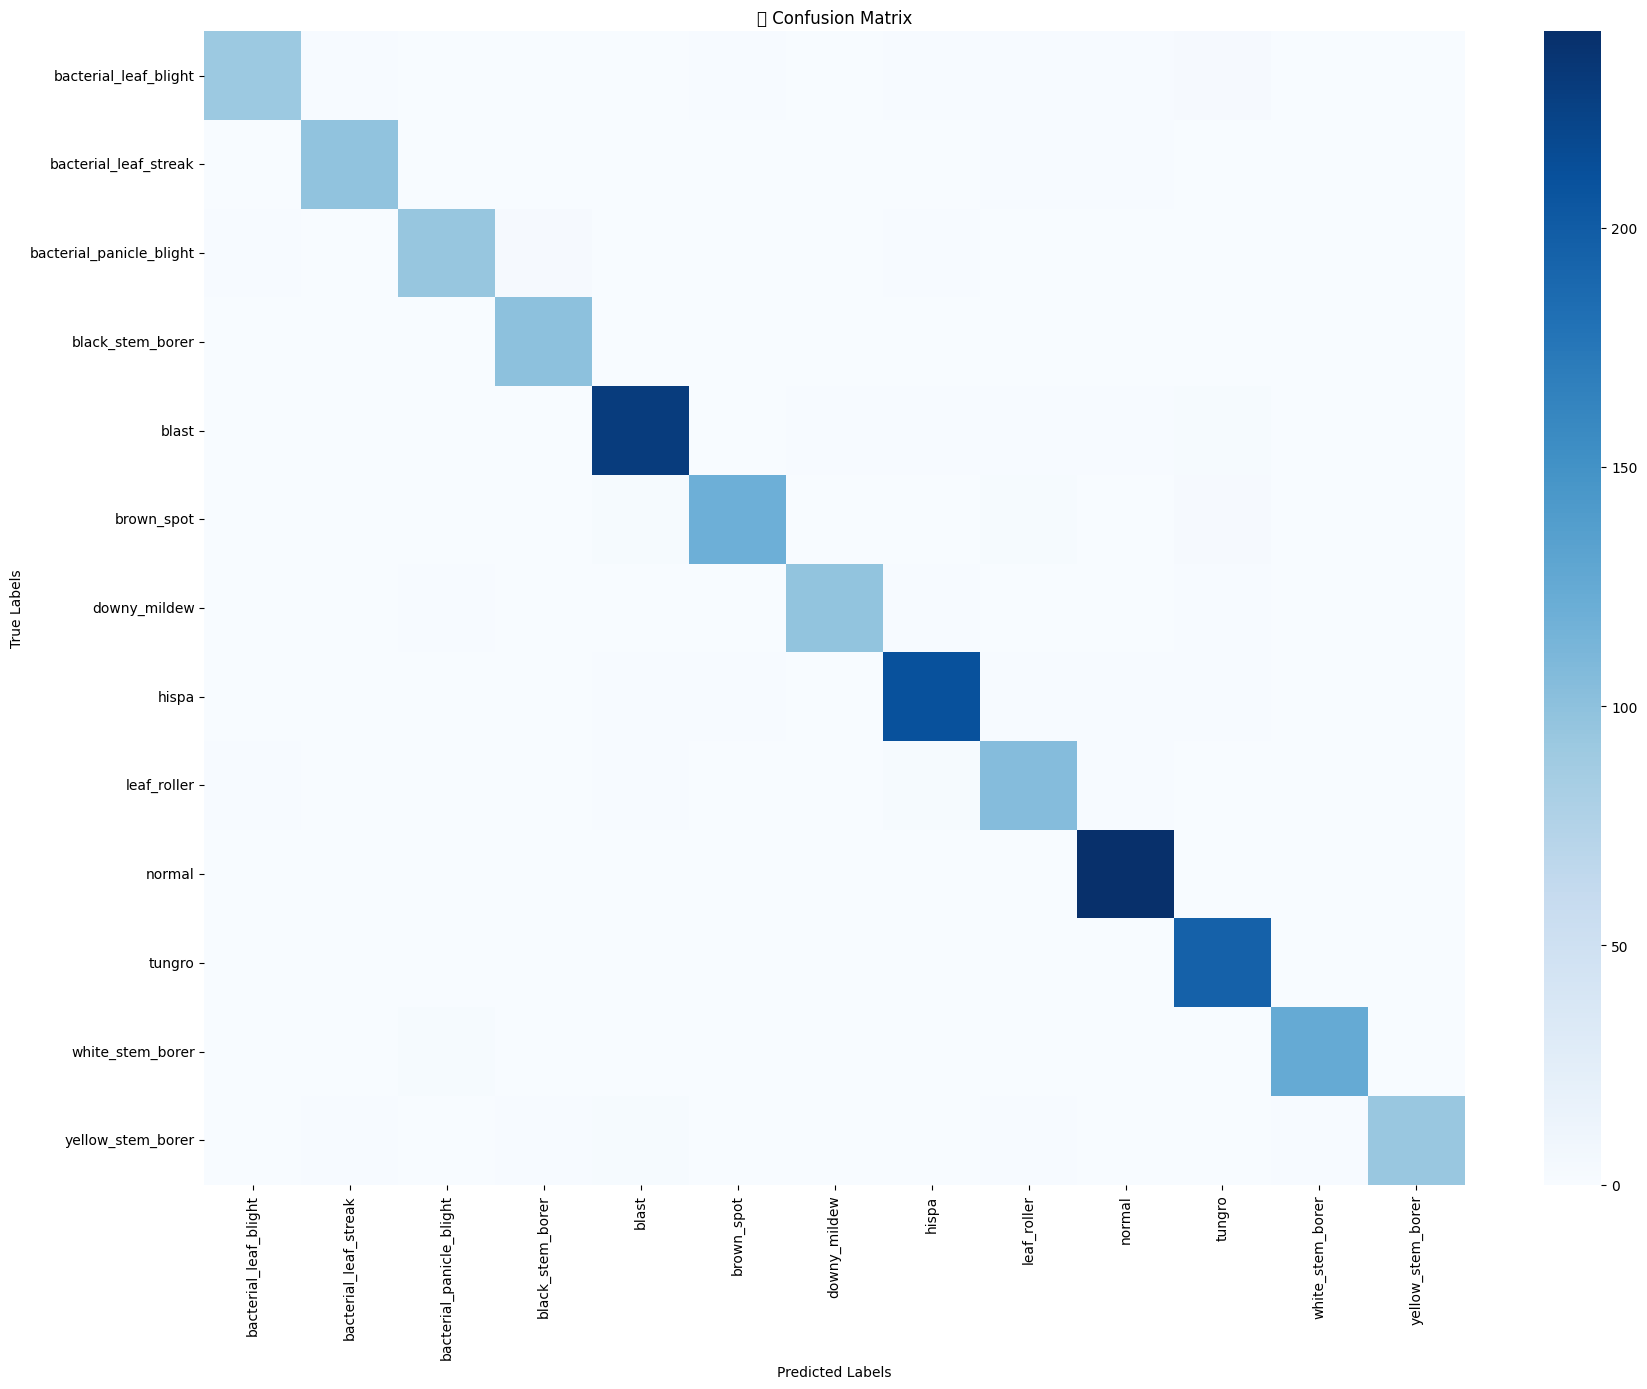


💥 Macro F1 Score           : 0.9714
📌 Mean Squared Error (MSE) : 0.8318
🚨 Manual Macro AUC (OvR)   : 0.9992


In [30]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    mean_squared_error, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Updated focal_loss for one-hot encoded labels
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        return tf.reduce_sum(alpha * tf.pow(1 - y_pred, gamma) * cross_entropy, axis=1)
    return focal_loss_fixed

# 🔹 Load the best model (v2)
model = load_model(
    "/content/drive/MyDrive/plant_disease_Classification_model/best_model_cnn_paddyv2.keras",
    custom_objects={'focal_loss_fixed': focal_loss(gamma=2.0, alpha=0.25)}
)

# 🔹 Evaluate the model on test data
test_loss, test_accuracy, test_precision, test_recall, test_auc, test_top5_acc = model.evaluate(test_generator, verbose=1)

print("\n📊 Test Evaluation Metrics:")
print(f"🔹 Loss           : {test_loss:.4f}")
print(f"🎯 Accuracy       : {test_accuracy:.4f}")
print(f"🧠 Precision      : {test_precision:.4f}")
print(f"🛡️ Recall         : {test_recall:.4f}")
print(f"🚀 AUC            : {test_auc:.4f}")
print(f"🏅 Top-5 Accuracy : {test_top5_acc:.4f}")

# 🔹 Predict on test data
y_probs = model.predict(test_generator, verbose=1)
y_preds = np.argmax(y_probs, axis=1)
y_true = test_generator.classes  # integer labels

# 🔹 Classification Report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true, y_preds, target_names=list(test_generator.class_indices.keys())))

# 🔹 Confusion Matrix
conf_mat = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(18, 14))
sns.heatmap(conf_mat, annot=False, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title("🔷 Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 🔹 Extra Metrics
f1 = f1_score(y_true, y_preds, average='macro')
mse = mean_squared_error(y_true, y_preds)
print(f"\n💥 Macro F1 Score           : {f1:.4f}")
print(f"📌 Mean Squared Error (MSE) : {mse:.4f}")

# 🔹 Manual Macro AUC via One-vs-Rest
y_true_bin = label_binarize(y_true, classes=np.arange(test_generator.num_classes))
auc_macro = roc_auc_score(y_true_bin, y_probs, average='macro', multi_class='ovr')
print(f"🚨 Manual Macro AUC (OvR)   : {auc_macro:.4f}")
